It is now possible to explore a ActivePaper via [Jupyter](http://jupyter.org/) or [IPython](http://ipython.org/index.html) notebook.
I will explore the ActivePaper I created in the previous [post](https://gchevrot.github.io/blog/output/activepapers.html). You can also find another example on a plublished ActivePaper [here](https://github.com/activepapers/activepapers-python/blob/read-only-exploration/examples/Water%20diffusion.ipynb).

### Imports

In [2]:
%matplotlib notebook
from activepapers.exploration import ActivePaper
import matplotlib.pyplot as plt
import numpy as np

### Open the ActivePaper

You can download the ActivePaper created in the previous blog [here](https://raw.githubusercontent.com/gchevrot/blog/gh-pages/downloads/activepapers/test.ap).

In [3]:
ap = ActivePaper('test.ap')

In [4]:
ap?

If there is README.txt file in the documentation group of your ActivePaper, it will automatically appear with the previous command.

### Extract the data

In [5]:
dset_1 = ap.data['inputs/dataset_1'][:]
dset_1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
result = ap.data['output/sum'][:]
result

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198])

### Plot the data

<IPython.core.display.Javascript object>


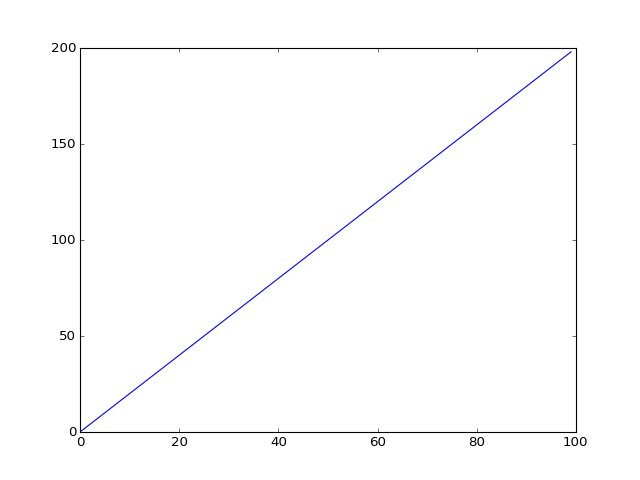

In [7]:
plt.plot(dset_1, result)
plt.show()

### Visualize a PDF file from the documentation

In [8]:
# A small wrapper around the data to tell Jupyter that this is PDF data
class PDF(object):
    def __init__(self, pdf_data):
        self.pdf_data = pdf_data
    def _repr_pdf_(self):
        return self.pdf_data

# Read the internal file
with ap.open_documentation('plot.pdf', mode='rb') as pdf_file:
    plot = PDF(pdf_file.read())
plot

### Read the code

In [9]:
adding_data_script = ap.read_code('adding_data')

In [10]:
print(adding_data_script)

from activepapers.contents import data
import numpy as np

# Create group for the output data
output = data.create_group('output')

input_data = data['inputs']

# Adding the 2 inputs array
arr_1 = input_data['dataset_1'][:].astype(np.int)
arr_2 = input_data['dataset_2'][...].astype(np.int)
sum = arr_1 + arr_2

# Writing the output 
output['sum'] = sum



### Extract and interact with the "python-packages" code

In this test.ap file, there is no "python-packages" in the code group. If you have one like in this [example](https://github.com/activepapers/activepapers-python/blob/read-only-exploration/examples/Water%20diffusion.ipynb), you can import the code (see the "import time_series" part) and interact with the code.